In [1]:
import pandas as pd
import numpy as np
import os
import cv2

In [2]:
data_dir = '/opt/dkube/input/severstal-steel-defect-detection/' 
image_dir = os.path.join(data_dir, 'train_images')
out_dir = '../output/'

In [1]:
def rle_to_mask(rle_string,height,width):
    rows, cols = height, width
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rleNumbers = [int(numstring) for numstring in rle_string.split(' ')]
        rlePairs = np.array(rleNumbers).reshape(-1,2)
        img = np.zeros(rows*cols,dtype=np.uint8)
        for index,length in rlePairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img
    
def mask_to_rle(mask):
    pixels= mask.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def get_mask(image_dir, row, img_w, img_h):
    img_id = row['ImageId']
#     print(img_id)
    file_path =  os.path.join(image_dir, img_id)
#     print(file_path)
    image = cv2.imread(file_path, 0)
    image_resized = cv2.resize(image, (img_w, img_h))
    image_resized = np.array(image_resized, dtype=np.float64)
    # standardization of the image
    image_resized -= image_resized.mean()
    image_resized /= image_resized.std()

    mask = np.empty((img_h, img_w, 4))

    rle = row['EncodedPixels']
    for idm, image_class in enumerate([1,2,3,4]):
        rle = row['EncodedPixels']
        if row['ClassId'] == image_class:
            class_mask = rle_to_mask(rle, width=img_w, height=img_h)
        else:
            class_mask = np.zeros((img_w, img_h))

        class_mask_resized = cv2.resize(class_mask, (img_w,img_h))
        mask[...,idm] = class_mask_resized
    X = np.expand_dims(image_resized, axis=2)
    y = mask
        
        # normalize Y
    y = (y > 0).astype(np.float32)

    return X, y

In [5]:
img_w = 800 # resized weidth
img_h = 256 # resized height
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))

In [6]:
len(train_df)

7095

In [5]:
# out_img_dir = out_dir + 'images/'
# out_mask_dir = out_dir + 'masks/'
# if not os.path.exists(out_img_dir):
#     os.makedirs(out_img_dir)
# if not os.path.exists(out_mask_dir):
#     os.makedirs(out_mask_dir)
# for i in range(10):#len(train_df)):
#     X, y = get_mask(image_dir, train_df.iloc[i], img_w, img_h)
#     filename = train_df.iloc[i]['ImageId']
#     print(X.shape, y.shape, filename)
#     cv2.imwrite(out_img_dir + filename, X*255)
#     cv2.imwrite(out_mask_dir + filename, y*255)

In [7]:
from matplotlib import pyplot as plt
out_img_dir = out_dir + 'images/'
if not os.path.exists(out_img_dir):
    os.makedirs(out_img_dir)
for i in range(10):#len(train_df)):
    X, y = get_mask(image_dir, train_df.iloc[i], img_w, img_h)
    filename = train_df.iloc[i]['ImageId']
    print(X.shape, filename)
    plt.imsave(out_img_dir + filename, X.reshape(256,800), cmap='gray')

(256, 800, 1) 0002cc93b.jpg
(256, 800, 1) 0007a71bf.jpg
(256, 800, 1) 000a4bcdd.jpg
(256, 800, 1) 000f6bf48.jpg
(256, 800, 1) 0014fce06.jpg
(256, 800, 1) 0025bde0c.jpg
(256, 800, 1) 0025bde0c.jpg
(256, 800, 1) 002af848d.jpg
(256, 800, 1) 002fc4e19.jpg
(256, 800, 1) 002fc4e19.jpg


In [8]:
image = cv2.imread('../output/images/0007a71bf.jpg')

In [9]:
type(image)

numpy.ndarray

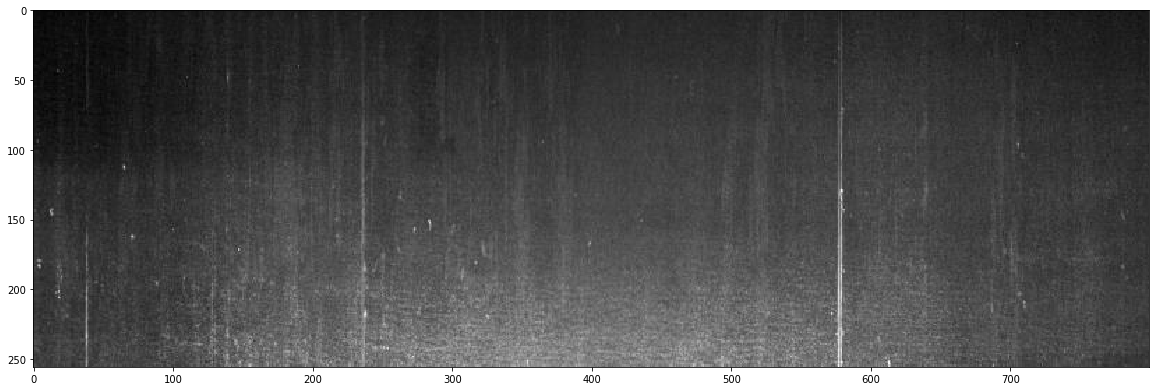

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,80))
plt.imshow(image, cmap='gray')

In [13]:
image = cv2.imread('../output/masks/0007a71bf.jpg')

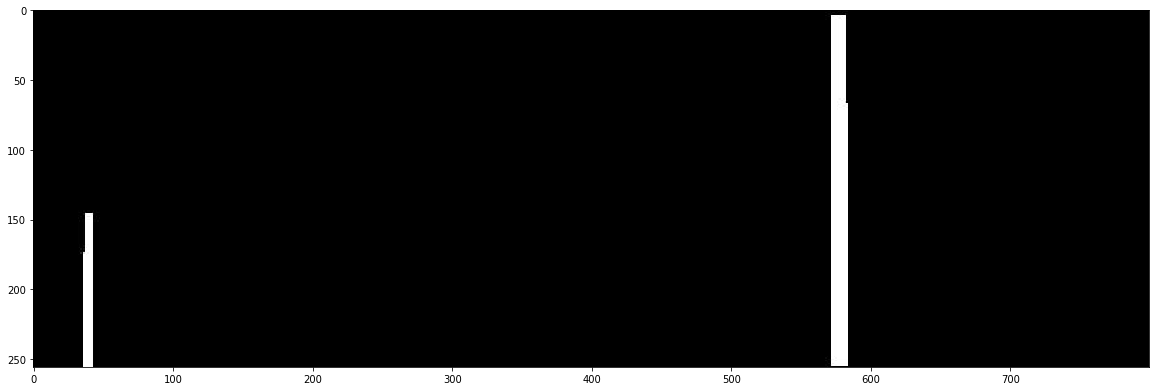

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,80))
plt.imshow(image, cmap='gray')